In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

%matplotlib inline
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings("ignore")

文件1为二手房，0为商品房

In [104]:
sc_price_index_files = glob("../datas/*/*_1.csv")
print(sc_price_index_files)
pd.read_csv(sc_price_index_files[0]).head(3)

['../datas\\m2\\feb_1.csv', '../datas\\m3\\march_1.csv', '../datas\\m4\\april_1.csv', '../datas\\m5\\may_1.csv', '../datas\\m6\\june_1.csv', '../datas\\m7\\july_1.csv']


,城市,环比,同比,1-2月平均,城市.1,环比.1,同比.1,1-2月平均.1
0,上月=100,上年同月=100,上年同期=100,上月=100,上年同月=100,上年同期=100,NaN,NaN
1,北 京,99.1,94.7,95.5,唐 山,99.3,93.9,94.1
2,天 津,99.4,96.9,97.4,秦 皇 岛,98.9,94.5,95.0


In [105]:
df = pd.DataFrame([], columns=['城市', '环比', '同比', '1-n月平均'])
for sc_price_index_file in sc_price_index_files:
    df_temp = pd.read_csv(sc_price_index_file).iloc[1:, :]
    df_temp_1 = df_temp.iloc[:, :4].values
    df_temp_2 = df_temp.iloc[:, 4:].values
    df_temp_new = np.vstack((df_temp_1, df_temp_2))
    df = pd.merge(df, pd.DataFrame(df_temp_new, columns=['城市', f'{sc_price_index_file[10]}月环比', f'{sc_price_index_file[10]}月同比', f'1-{sc_price_index_file[10]}月平均']), on=['城市'], how="outer")

In [106]:
df_use = df.iloc[:, 3:]
print(list(df_use.columns))
df_use['城市'] = df_use['城市'].replace(r'\s+', '', regex=True)
df_use.head(3)

['城市', '2月环比', '2月同比', '1-2月平均', '3月环比', '3月同比', '1-3月平均', '4月环比', '4月同比', '1-4月平均', '5月环比', '5月同比', '1-5月平均', '6月环比', '6月同比', '1-6月平均', '7月环比', '7月同比', '1-7月平均']


,城市,2月环比,2月同比,1-2月平均,3月环比,3月同比,1-3月平均,4月环比,4月同比,1-4月平均,5月环比,5月同比,1-5月平均,6月环比,6月同比,1-6月平均,7月环比,7月同比,1-7月平均
0,北京,99.1,94.7,95.5,99.6,93.6,94.8,98.4,92.0,94.1,98.8,91.4,93.6,100.2,92.2,93.3,100.0,92.8,93.3
1,天津,99.4,96.9,97.4,99.3,96.1,97.0,98.7,95.0,96.5,98.9,93.8,96.0,99.6,93.6,95.6,99.2,93.2,95.2
2,石家庄,99.4,97.5,97.9,99.8,97.1,97.6,99.4,96.7,97.4,98.9,95.8,97.1,98.9,95.0,96.7,99.7,94.7,96.4


城市间对比，非趋势图，个人认为查看平均变化情况即可

In [107]:
for col in df_use.columns[1:]:
    df_use[col] = df_use[col].astype(float)
# df_use.info()

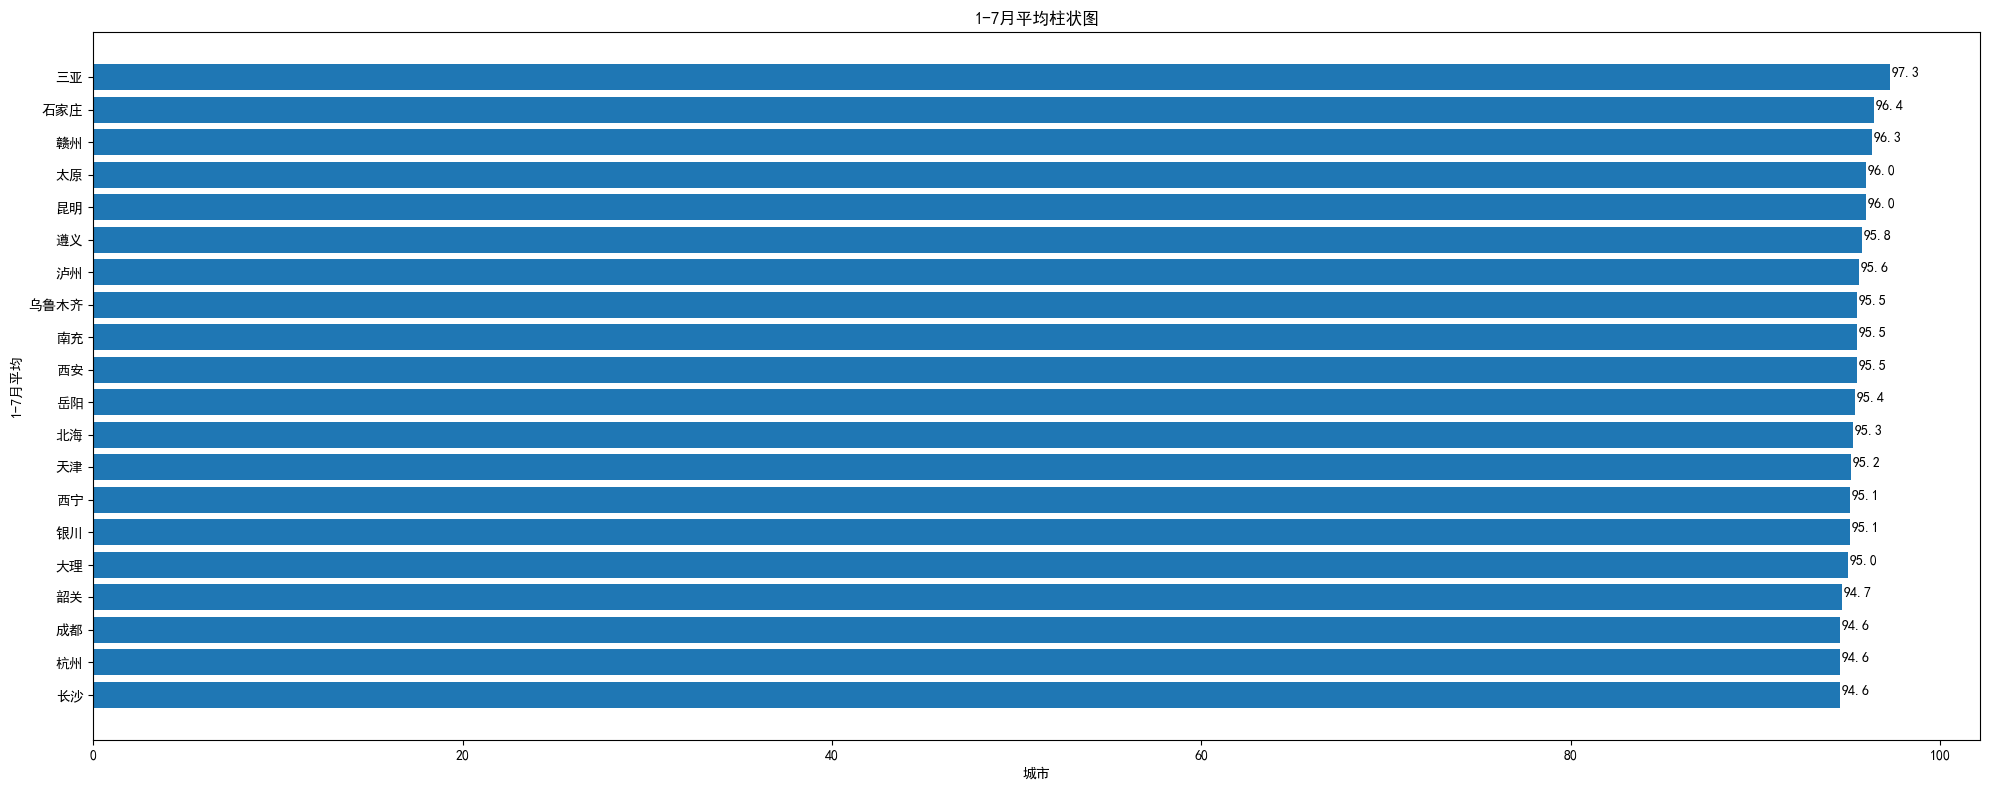

In [108]:
def plotPrice(month=4, name='环比'):
    df_sorted = df_use.sort_values(by=f'{month}月{name}', ascending=True).iloc[-20:, :]
    
    # 绘制柱状图  
    plt.figure(figsize=(20, 8))  # 设置图形大小  
    plt.barh(df_sorted['城市'], df_sorted[f'{month}月{name}'])  # 绘制柱状图  , color='skyblue'
    
    # 设置图形标题和坐标轴标签  
    plt.title(f'{month}月{name}柱状图')  
    plt.xlabel('城市')  
    plt.ylabel(f'{month}月{name}')  
    
    # 显示图形  
    plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  

    # 添加数值标签
    for i, v in enumerate(df_sorted[f'{month}月{name}']):
        plt.text(float(v) + 0.1, i, str(v), color='black')
        
    plt.show()

plotPrice('1-7', '平均')

单城市趋势图

In [74]:
df_use['城市'].unique()

array(['北京', '天津', '石家庄', '太原', '呼和浩特', '沈阳', '大连', '长春', '哈尔滨', '上海',
       '南京', '杭州', '宁波', '合肥', '福州', '厦门', '南昌', '济南', '青岛', '郑州', '武汉',
       '长沙', '广州', '深圳', '南宁', '海口', '重庆', '成都', '贵阳', '昆明', '西安', '兰州',
       '西宁', '银川', '乌鲁木齐', '唐山', '秦皇岛', '包头', '丹东', '锦州', '吉林', '牡丹江',
       '无锡', '徐州', '扬州', '温州', '金华', '蚌埠', '安庆', '泉州', '九江', '赣州', '烟台',
       '济宁', '洛阳', '平顶山', '宜昌', '襄阳', '岳阳', '常德', '韶关', '湛江', '惠州', '桂林',
       '北海', '三亚', '泸州', '南充', '遵义', '大理'], dtype=object)

In [109]:
df_temp = df_use.loc[df_use['城市'] == '西安', :]
column_use = [x for x in df_use.columns if '环比' in x]
df_temp = df_temp[column_use]
df_temp.values.flatten()

array([99.6, 99.7, 99.4, 99. , 99.2, 99.4])

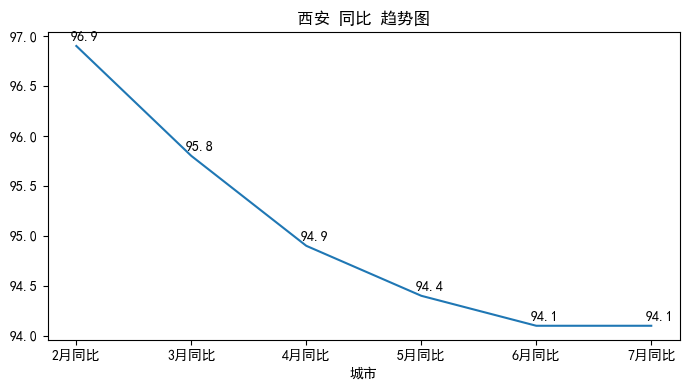

In [119]:
def plotCityPrice(city, name='环比'):
    
    df_temp = df_use.loc[df_use['城市'] == city, :]

    column_use = [x for x in df_use.columns if name in x]
    df_temp = df_temp[column_use]
    # 绘制柱状图  
    plt.figure(figsize=(7, 4))  # 设置图形大小  
    # plt.bar(df_temp.columns, df_temp.values.flatten(), width=0.4)  # 绘制柱状图  , color='skyblue'
    plt.plot(df_temp.columns, df_temp.values.flatten(), )
    
    # 设置图形标题和坐标轴标签  
    plt.title(f'{city} {name} 趋势图')  
    plt.xlabel('城市')  
    # plt.ylabel(f'%')  
    
    # 显示图形  
    plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  

    # 添加数值标签
    for i, v in enumerate(df_temp.values.flatten()):
        plt.text(i - 0.05, float(v) + 0.05, str(v), color='black')
        
    plt.show()

plotCityPrice('西安', '同比')